In [1]:
import optuna
import torch
import numpy as np

In [7]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [8]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [9]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3411, 0.5533],
        [0.2031, 0.0946]]) 



In [10]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2847, 0.3870, 0.0892],
        [0.3410, 0.5088, 0.2185]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [11]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [12]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [13]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [14]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [15]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [17]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [18]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [19]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [20]:
n = np.ones(5)
t = torch.from_numpy(n)

In [21]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [22]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Jalon/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [23]:
prediction = model(data) # forward pass

In [24]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

In [25]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [26]:
optim.step() #gradient descent

In [27]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [28]:
Q = 3*a**3 - b**2

In [29]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [30]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [31]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


In [32]:
from torch import nn, optim

model = resnet18(weights=ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [33]:
model.fc = nn.Linear(512, 10)

In [34]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # Convolution layer C1: 1 input image channel, 6 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a Tensor with size (N, 6, 28, 28), where N is the size of the batch
        c1 = F.relu(self.conv1(input))
        # Subsampling layer S2: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 6, 14, 14) Tensor
        s2 = F.max_pool2d(c1, (2, 2))
        # Convolution layer C3: 6 input channels, 16 output channels,
        # 5x5 square convolution, it uses RELU activation function, and
        # outputs a (N, 16, 10, 10) Tensor
        c3 = F.relu(self.conv2(s2))
        # Subsampling layer S4: 2x2 grid, purely functional,
        # this layer does not have any parameter, and outputs a (N, 16, 5, 5) Tensor
        s4 = F.max_pool2d(c3, 2)
        # Flatten operation: purely functional, outputs a (N, 400) Tensor
        s4 = torch.flatten(s4, 1)
        # Fully connected layer F5: (N, 400) Tensor input,
        # and outputs a (N, 120) Tensor, it uses RELU activation function
        f5 = F.relu(self.fc1(s4))
        # Fully connected layer F6: (N, 120) Tensor input,
        # and outputs a (N, 84) Tensor, it uses RELU activation function
        f6 = F.relu(self.fc2(f5))
        # Gaussian layer OUTPUT: (N, 84) Tensor input, and
        # outputs a (N, 10) Tensor
        output = self.fc3(f6)
        return output


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [36]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [37]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0551,  0.1264, -0.0252, -0.1200,  0.0077, -0.0072,  0.0094, -0.0305,
          0.0620,  0.0869]], grad_fn=<AddmmBackward0>)


In [38]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [39]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.2093, grad_fn=<MseLossBackward0>)


In [40]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [41]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0078, -0.0185,  0.0035,  0.0110, -0.0109,  0.0304])


In [42]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [43]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


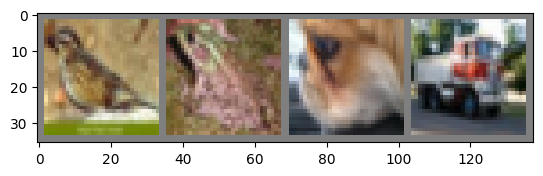

bird  frog  dog   truck


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [21]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [23]:
torch.cuda.device_count()

1

In [24]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [25]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [26]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.035
[1,  4000] loss: 1.821
[1,  6000] loss: 1.735
[1,  8000] loss: 1.678
[1, 10000] loss: 1.618
[1, 12000] loss: 1.584
[2,  2000] loss: 1.557
[2,  4000] loss: 1.542
[2,  6000] loss: 1.482
[2,  8000] loss: 1.489
[2, 10000] loss: 1.477
[2, 12000] loss: 1.456
[3,  2000] loss: 1.443
[3,  4000] loss: 1.406
[3,  6000] loss: 1.398
[3,  8000] loss: 1.374
[3, 10000] loss: 1.383
[3, 12000] loss: 1.367
[4,  2000] loss: 1.346
[4,  4000] loss: 1.332
[4,  6000] loss: 1.347
[4,  8000] loss: 1.306
[4, 10000] loss: 1.296
[4, 12000] loss: 1.270
[5,  2000] loss: 1.278
[5,  4000] loss: 1.265
[5,  6000] loss: 1.244
[5,  8000] loss: 1.233
[5, 10000] loss: 1.240
[5, 12000] loss: 1.206
Finished Training


In [27]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

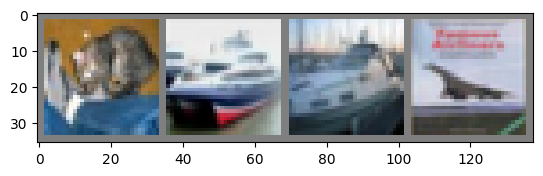

GroundTruth:  cat   ship  ship  plane


In [28]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [29]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [30]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  horse truck frog  dog  


In [31]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [32]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.2 %
Accuracy for class: car   is 72.8 %
Accuracy for class: bird  is 36.4 %
Accuracy for class: cat   is 31.2 %
Accuracy for class: deer  is 40.5 %
Accuracy for class: dog   is 35.7 %
Accuracy for class: frog  is 78.8 %
Accuracy for class: horse is 66.3 %
Accuracy for class: ship  is 65.5 %
Accuracy for class: truck is 65.1 %


In [51]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import json
from itertools import product
import time


# Define Base Network
class BaseNet(nn.Module):
    def __init__(self):
        super(BaseNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Define Modified Network (Batch Norm + Residual Connections)
class ModifiedNet(nn.Module):
    def __init__(self):
        super(ModifiedNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, 3)
        self.bn3 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        residual = x
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        residual = self.pool(self.bn1(self.conv1(residual)))
        x = x + residual
        residual = x
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        residual = self.pool(self.bn2(self.conv2(residual)))
        x = x + residual
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# Load the CIFAR-10 dataset
def get_dataloaders(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(
        root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=batch_size, shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(
        root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return trainloader, testloader


# Train and Evaluate the Model
def train_and_evaluate(net, trainloader, testloader, optimizer, criterion, epochs, device, classes):
    net.to(device)
    train_loss = []

    for epoch in range(epochs):
        running_loss = 0.0
        net.train()
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels_one_hot = torch.nn.functional.one_hot(labels, num_classes=len(classes)).float()

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels_one_hot)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss.append(running_loss / len(trainloader))

    # Evaluate on validation set
    net.eval()
    correct = 0
    total = 0
    class_correct = [0 for _ in range(len(classes))]
    class_total = [0 for _ in range(len(classes))]

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i]
                pred = predicted[i]
                if label == pred:
                    class_correct[label] += 1
                class_total[label] += 1

    overall_accuracy = 100 * correct / total
    per_class_accuracy = {classes[i]: 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
                          for i in range(len(classes))}

    return train_loss, overall_accuracy, per_class_accuracy


# Experiment Parameters
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [64, 128, 512]
optimizers = ['SGD', 'Adam']
# optimizers = ['Adam']

loss_functions = ['CrossEntropy', 'MSE']
# loss_functions = ['MSE']

# architectures = ['BaseNet', 'ModifiedNet']
architectures = ['BaseNet']
epochs_list = [10, 20, 30]
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Results Storage
results = []

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Run Experiments
for lr, batch_size, optimizer_type, loss_function, architecture, epochs in product(
        learning_rates, batch_sizes, optimizers, loss_functions, architectures, epochs_list):

    print(f"Running experiment: lr={lr}, batch_size={batch_size}, optimizer={optimizer_type}, "
          f"loss_function={loss_function}, architecture={architecture}, epochs={epochs}")

    # Initialize network
    if architecture == 'BaseNet':
        net = BaseNet()
    elif architecture == 'ModifiedNet':
        net = ModifiedNet()

    # Initialize loss function
    if loss_function == 'CrossEntropy':
        criterion = nn.CrossEntropyLoss()
    elif loss_function == 'MSE':
        criterion = nn.MSELoss()

    # Initialize optimizer
    if optimizer_type == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    elif optimizer_type == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=lr)

    # Load data
    trainloader, testloader = get_dataloaders(batch_size)

    # Train and evaluate
    start_time = time.time()
    train_loss, overall_accuracy, per_class_accuracy = train_and_evaluate(
        net, trainloader, testloader, optimizer, criterion, epochs, device, classes)
    end_time = time.time()

    # Save results
    results.append({
        'learning_rate': lr,
        'batch_size': batch_size,
        'optimizer': optimizer_type,
        'loss_function': loss_function,
        'architecture': architecture,
        'epochs': epochs,
        'train_loss': train_loss,
        'overall_accuracy': overall_accuracy,
        'per_class_accuracy': per_class_accuracy,
        'time_taken': end_time - start_time
    })

    print(f"Completed: lr={lr}, batch_size={batch_size}, optimizer={optimizer_type}, "
          f"loss_function={loss_function}, architecture={architecture}, epochs={epochs}")
    print(f"Validation Accuracy: {overall_accuracy:.2f}%")
    print("Per-Class Accuracy:")
    for class_name, acc in per_class_accuracy.items():
        print(f"{class_name}: {acc:.2f}%")
    print()

# Save results to JSON
with open('experiment_results.json', 'w') as f:
    json.dump(results, f, indent=4)

print("All experiments completed and results saved to 'experiment_results.json'")


Running experiment: lr=0.01, batch_size=64, optimizer=SGD, loss_function=CrossEntropy, architecture=BaseNet, epochs=10
Files already downloaded and verified
Files already downloaded and verified
Completed: lr=0.01, batch_size=64, optimizer=SGD, loss_function=CrossEntropy, architecture=BaseNet, epochs=10
Validation Accuracy: 62.01%
Per-Class Accuracy:
plane: 67.10%
car: 84.10%
bird: 45.90%
cat: 34.20%
deer: 50.00%
dog: 56.20%
frog: 77.70%
horse: 66.50%
ship: 72.90%
truck: 65.50%

Running experiment: lr=0.01, batch_size=64, optimizer=SGD, loss_function=CrossEntropy, architecture=BaseNet, epochs=20
Files already downloaded and verified
Files already downloaded and verified
Completed: lr=0.01, batch_size=64, optimizer=SGD, loss_function=CrossEntropy, architecture=BaseNet, epochs=20
Validation Accuracy: 62.15%
Per-Class Accuracy:
plane: 65.20%
car: 77.70%
bird: 53.50%
cat: 48.20%
deer: 57.90%
dog: 49.70%
frog: 66.80%
horse: 57.70%
ship: 76.10%
truck: 68.70%

Running experiment: lr=0.01, bat

In [54]:
import optuna

results = []
# Define an objective function to be minimized.
def objective(trial):
    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # # Invoke suggest methods of a Trial object to generate hyperparameters.
    # regressor_name = trial.suggest_categorical('regressor', ['SVR', 'RandomForest'])
    # if regressor_name == 'SVR':
    #     svr_c = trial.suggest_float('svr_c', 1e-10, 1e10, log=True)
    #     regressor_obj = sklearn.svm.SVR(C=svr_c)
    # else:
    #     rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
    #     regressor_obj = sklearn.ensemble.RandomForestRegressor(max_depth=rf_max_depth)
    #
    # X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)
    # X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=0)
    #
    # regressor_obj.fit(X_train, y_train)
    # y_pred = regressor_obj.predict(X_val)
    net = BaseNet()
    epochs = trial.suggest_categorical('epochs', [10, 20, 30, 40])
    batch_size = trial.suggest_categorical('batch_size', [64, 128, 256, 512])
    lr = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    trainloader, testloader = get_dataloaders(batch_size)
    criterion = nn.CrossEntropyLoss()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    print(f"Running experiment: lr={lr}, batch_size={batch_size}, optimizer={'SGD'}, "
          f"loss_function={'CrossEntropy'}, architecture={'BaseNet'}, epochs={epochs}")
    train_loss, overall_accuracy, per_class_accuracy = train_and_evaluate(
        net, trainloader, testloader, optimizer, criterion, epochs, device, classes)

    acc = overall_accuracy
    results.append({
        'learning_rate': lr,
        'batch_size': batch_size,
        'optimizer': 'SGD',
        'loss_function': 'CrossEntropy',
        'architecture': 'BaseNet',
        'epochs': epochs,
        'train_loss': train_loss,
        'overall_accuracy': overall_accuracy,
        'per_class_accuracy': per_class_accuracy,
        'time_taken': end_time - start_time
    })

    return acc  # An objective value linked with the Trial object.

study = optuna.create_study(direction="maximize")  # Create a new study.
study.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

[I 2024-11-29 16:16:17,803] A new study created in memory with name: no-name-27ae235d-f399-4a43-80e7-fd85b69a1f44


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.026535288486751688, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 16:19:10,099] Trial 0 finished with value: 62.66 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.026535288486751688}. Best is trial 0 with value: 62.66.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0012477364610821043, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 16:22:29,857] Trial 1 finished with value: 35.6 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.0012477364610821043}. Best is trial 0 with value: 62.66.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.05882470724613029, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 16:25:36,494] Trial 2 finished with value: 62.3 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.05882470724613029}. Best is trial 0 with value: 62.66.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=5.53374976396126e-05, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 16:30:18,009] Trial 3 finished with value: 13.59 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 5.53374976396126e-05}. Best is trial 0 with value: 62.66.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.03933484046587426, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 16:32:02,042] Trial 4 finished with value: 64.14 and parameters: {'epochs': 10, 'batch_size': 256, 'learning_rate': 0.03933484046587426}. Best is trial 4 with value: 64.14.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.004512502728148094, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 16:37:11,104] Trial 5 finished with value: 62.1 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 0.004512502728148094}. Best is trial 4 with value: 64.14.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.001840925091707716, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 16:43:53,218] Trial 6 finished with value: 65.06 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.001840925091707716}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.011439328080416951, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 16:48:42,891] Trial 7 finished with value: 60.55 and parameters: {'epochs': 40, 'batch_size': 128, 'learning_rate': 0.011439328080416951}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0006414579841328934, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 16:52:32,306] Trial 8 finished with value: 60.55 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 0.0006414579841328934}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.004874446371660807, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 16:57:34,519] Trial 9 finished with value: 60.65 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.004874446371660807}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=2.112923987214391e-05, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 17:02:45,215] Trial 10 finished with value: 10.0 and parameters: {'epochs': 40, 'batch_size': 256, 'learning_rate': 2.112923987214391e-05}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0001727336512106733, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:04:22,232] Trial 11 finished with value: 10.0 and parameters: {'epochs': 10, 'batch_size': 256, 'learning_rate': 0.0001727336512106733}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.06730256318035874, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:05:58,825] Trial 12 finished with value: 59.28 and parameters: {'epochs': 10, 'batch_size': 256, 'learning_rate': 0.06730256318035874}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0007366142073393754, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:07:17,257] Trial 13 finished with value: 47.76 and parameters: {'epochs': 10, 'batch_size': 64, 'learning_rate': 0.0007366142073393754}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0028678376955945002, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:08:29,185] Trial 14 finished with value: 50.46 and parameters: {'epochs': 10, 'batch_size': 256, 'learning_rate': 0.0028678376955945002}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00020117467735670147, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 17:14:13,697] Trial 15 finished with value: 52.16 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.00020117467735670147}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.014741797536801533, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 17:20:49,290] Trial 16 finished with value: 59.97 and parameters: {'epochs': 40, 'batch_size': 256, 'learning_rate': 0.014741797536801533}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.09315001966020037, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:22:36,803] Trial 17 finished with value: 57.27 and parameters: {'epochs': 10, 'batch_size': 128, 'learning_rate': 0.09315001966020037}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.022066287344998773, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:24:27,722] Trial 18 finished with value: 61.59 and parameters: {'epochs': 10, 'batch_size': 64, 'learning_rate': 0.022066287344998773}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00023197474542789573, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 17:29:56,950] Trial 19 finished with value: 32.7 and parameters: {'epochs': 40, 'batch_size': 256, 'learning_rate': 0.00023197474542789573}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0018171898843332632, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 17:35:27,646] Trial 20 finished with value: 61.21 and parameters: {'epochs': 40, 'batch_size': 256, 'learning_rate': 0.0018171898843332632}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.016815910796101046, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 17:38:52,550] Trial 21 finished with value: 64.62 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.016815910796101046}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00936839522490487, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 17:42:24,040] Trial 22 finished with value: 59.84 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.00936839522490487}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.02630028344104844, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 17:45:59,885] Trial 23 finished with value: 64.07 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.02630028344104844}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.006345256594954424, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 17:49:33,746] Trial 24 finished with value: 58.39 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.006345256594954424}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.05194268622005352, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 17:52:36,984] Trial 25 finished with value: 62.38 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.05194268622005352}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.03726440703562502, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 17:54:00,434] Trial 26 finished with value: 54.68 and parameters: {'epochs': 10, 'batch_size': 64, 'learning_rate': 0.03726440703562502}. Best is trial 6 with value: 65.06.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0024148734447732635, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 17:58:17,835] Trial 27 finished with value: 65.73 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.0024148734447732635}. Best is trial 27 with value: 65.73.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00041333472502443286, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:03:14,991] Trial 28 finished with value: 49.36 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.00041333472502443286}. Best is trial 27 with value: 65.73.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0022984652393107036, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:08:13,777] Trial 29 finished with value: 63.2 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.0022984652393107036}. Best is trial 27 with value: 65.73.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0032780455695832367, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:12:35,560] Trial 30 finished with value: 66.1 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.0032780455695832367}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0034815200019579435, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:16:52,000] Trial 31 finished with value: 64.24 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.0034815200019579435}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.001141444614277384, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:21:05,147] Trial 32 finished with value: 59.73 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.001141444614277384}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0011033665701234493, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:25:40,493] Trial 33 finished with value: 60.92 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.0011033665701234493}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00174372519890185, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 18:28:32,691] Trial 34 finished with value: 43.38 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.00174372519890185}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.008214098340061964, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:32:45,791] Trial 35 finished with value: 61.53 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.008214098340061964}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00035446288092072736, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:36:59,206] Trial 36 finished with value: 45.25 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.00035446288092072736}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.018854914919628117, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 18:39:48,543] Trial 37 finished with value: 61.99 and parameters: {'epochs': 20, 'batch_size': 512, 'learning_rate': 0.018854914919628117}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.004653413248102379, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:44:48,439] Trial 38 finished with value: 64.14 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.004653413248102379}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=8.77299604232857e-05, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 18:50:00,474] Trial 39 finished with value: 30.74 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 8.77299604232857e-05}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.013145674242968013, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 18:58:34,868] Trial 40 finished with value: 65.69 and parameters: {'epochs': 40, 'batch_size': 512, 'learning_rate': 0.013145674242968013}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.011960162826550986, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:07:16,771] Trial 41 finished with value: 62.8 and parameters: {'epochs': 40, 'batch_size': 512, 'learning_rate': 0.011960162826550986}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.006481029109971257, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:13:59,376] Trial 42 finished with value: 62.62 and parameters: {'epochs': 40, 'batch_size': 512, 'learning_rate': 0.006481029109971257}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0025922455069342597, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:20:50,259] Trial 43 finished with value: 57.54 and parameters: {'epochs': 40, 'batch_size': 512, 'learning_rate': 0.0025922455069342597}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0007191279353802252, batch_size=512, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:26:43,073] Trial 44 finished with value: 39.46 and parameters: {'epochs': 40, 'batch_size': 512, 'learning_rate': 0.0007191279353802252}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0034598576435911016, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 19:29:13,726] Trial 45 finished with value: 65.63 and parameters: {'epochs': 20, 'batch_size': 64, 'learning_rate': 0.0034598576435911016}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.001624856854919311, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:34:07,885] Trial 46 finished with value: 64.99 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.001624856854919311}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.003939166919400249, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 19:37:55,722] Trial 47 finished with value: 62.76 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 0.003939166919400249}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0056809868232766195, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:43:05,363] Trial 48 finished with value: 60.65 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0056809868232766195}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.00303367233878837, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 19:48:23,526] Trial 49 finished with value: 64.57 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 0.00303367233878837}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0007031489714620079, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 19:55:24,378] Trial 50 finished with value: 56.5 and parameters: {'epochs': 40, 'batch_size': 128, 'learning_rate': 0.0007031489714620079}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0015983119727064961, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:01:22,863] Trial 51 finished with value: 62.96 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0015983119727064961}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0015033552050283429, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:07:27,699] Trial 52 finished with value: 65.71 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0015033552050283429}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0009948639869958877, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:19:05,236] Trial 53 finished with value: 64.05 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0009948639869958877}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0021427572943870676, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:25:44,558] Trial 54 finished with value: 62.53 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0021427572943870676}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0004354489577658535, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:32:13,927] Trial 55 finished with value: 59.29 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0004354489577658535}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0037964419880097307, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 20:35:09,026] Trial 56 finished with value: 63.77 and parameters: {'epochs': 20, 'batch_size': 64, 'learning_rate': 0.0037964419880097307}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.010484829644541489, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:40:49,126] Trial 57 finished with value: 62.18 and parameters: {'epochs': 40, 'batch_size': 128, 'learning_rate': 0.010484829644541489}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=2.0256306462171806e-05, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 20:44:16,503] Trial 58 finished with value: 10.13 and parameters: {'epochs': 20, 'batch_size': 64, 'learning_rate': 2.0256306462171806e-05}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.001385582945721371, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 20:50:13,005] Trial 59 finished with value: 64.67 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.001385582945721371}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.006596338127301161, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 20:54:15,626] Trial 60 finished with value: 63.64 and parameters: {'epochs': 30, 'batch_size': 128, 'learning_rate': 0.006596338127301161}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0014602217878133396, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:00:06,391] Trial 61 finished with value: 64.63 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0014602217878133396}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0009744267699481026, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:06:00,240] Trial 62 finished with value: 63.2 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0009744267699481026}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0023200296170602748, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:12:53,802] Trial 63 finished with value: 62.99 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0023200296170602748}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0005786244226727244, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:19:05,384] Trial 64 finished with value: 48.24 and parameters: {'epochs': 40, 'batch_size': 256, 'learning_rate': 0.0005786244226727244}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0029024901020817872, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=10


[I 2024-11-29 21:20:25,443] Trial 65 finished with value: 60.28 and parameters: {'epochs': 10, 'batch_size': 64, 'learning_rate': 0.0029024901020817872}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0047641430481626295, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 21:22:58,209] Trial 66 finished with value: 64.4 and parameters: {'epochs': 20, 'batch_size': 64, 'learning_rate': 0.0047641430481626295}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0019714757573675167, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:28:15,503] Trial 67 finished with value: 64.65 and parameters: {'epochs': 40, 'batch_size': 128, 'learning_rate': 0.0019714757573675167}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.007843645471489078, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=30


[I 2024-11-29 21:32:28,373] Trial 68 finished with value: 62.05 and parameters: {'epochs': 30, 'batch_size': 64, 'learning_rate': 0.007843645471489078}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.014291571675009235, batch_size=128, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:37:53,761] Trial 69 finished with value: 60.35 and parameters: {'epochs': 40, 'batch_size': 128, 'learning_rate': 0.014291571675009235}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0008527226342784033, batch_size=256, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=20


[I 2024-11-29 21:40:28,967] Trial 70 finished with value: 40.82 and parameters: {'epochs': 20, 'batch_size': 256, 'learning_rate': 0.0008527226342784033}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0012926010978636256, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:46:36,420] Trial 71 finished with value: 65.09 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0012926010978636256}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.0012362321984883044, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:52:43,374] Trial 72 finished with value: 64.77 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.0012362321984883044}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=1.3685374071012815e-05, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[I 2024-11-29 21:59:11,161] Trial 73 finished with value: 11.55 and parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 1.3685374071012815e-05}. Best is trial 30 with value: 66.1.


Files already downloaded and verified
Files already downloaded and verified
Running experiment: lr=0.001687849337077269, batch_size=64, optimizer=Adam, loss_function=MSE, architecture=BaseNet, epochs=40


[W 2024-11-29 22:01:43,361] Trial 74 failed with parameters: {'epochs': 40, 'batch_size': 64, 'learning_rate': 0.001687849337077269} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\Jalon\OneDrive\桌面\in The Netherland\Deep Learning\assignments\asg2\vugrad_deep_learning_asg2\.venv\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Jalon\AppData\Local\Temp\ipykernel_29596\2690416605.py", line 32, in objective
    train_loss, overall_accuracy, per_class_accuracy = train_and_evaluate(
                                                       ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jalon\AppData\Local\Temp\ipykernel_29596\3342143194.py", line 91, in train_and_evaluate
    for inputs, labels in trainloader:
  File "C:\Users\Jalon\OneDrive\桌面\in The Netherland\Deep Learning\assignments\asg2\vugrad_deep_learning_asg2\.venv\Lib\site-packages\t

KeyboardInterrupt: 

In [60]:
# Save results to JSON
with open('experiment_results_q11.json', 'w') as f:
    json.dump(results, f, indent=4)

print("All experiments completed and results saved to 'experiment_results.json'")

All experiments completed and results saved to 'experiment_results.json'


In [59]:
results

[{'learning_rate': 0.026535288486751688,
  'batch_size': 512,
  'optimizer': 'SGD',
  'loss_function': 'CrossEntropy',
  'architecture': 'BaseNet',
  'epochs': 20,
  'train_loss': [2.205583627126655,
   1.8066114248061667,
   1.5503369192687833,
   1.4071659737703752,
   1.309522418343291,
   1.2345550863110288,
   1.166941335006636,
   1.1038650627038917,
   1.0521221580554028,
   1.023337497394912,
   0.9799261360752339,
   0.9482601211995495,
   0.9266233699662345,
   0.8824225852684099,
   0.852756679058075,
   0.8283248628888812,
   0.7967119283822118,
   0.776194436817753,
   0.7538842692667124,
   0.7281438890768557],
  'overall_accuracy': 62.66,
  'per_class_accuracy': {'plane': 53.6,
   'car': 70.6,
   'bird': 61.5,
   'cat': 44.8,
   'deer': 64.4,
   'dog': 54.5,
   'frog': 72.7,
   'horse': 57.4,
   'ship': 77.3,
   'truck': 69.8},
  'time_taken': 201.6435739994049},
 {'learning_rate': 0.0012477364610821043,
  'batch_size': 512,
  'optimizer': 'SGD',
  'loss_function': 'Cros